In [3]:
#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv

#Twitter API credentials
consumer_key = ''
consumer_secret =''
access_key = ''
access_secret = ''


def get_all_tweets(screen_name):
	#Twitter only allows access to a users most recent 3240 tweets with this method
	
	#authorize twitter, initialize tweepy
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	
	#initialize a list to hold all the tweepy Tweets
	alltweets = []	
	
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	
	#save most recent tweets
	alltweets.extend(new_tweets)
	
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1
	
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		print "getting tweets before %s" % (oldest)
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
		
		print "...%s tweets downloaded so far" % (len(alltweets))
	
	#transform the tweepy tweets into a 2D array that will populate the csv	
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
	
	#write the csv	
	with open('%s_tweets.csv' % screen_name, 'wb') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text"])
		writer.writerows(outtweets)
	
	pass


if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets("ArvindKejriwal")

getting tweets before 721559183414456319
...400 tweets downloaded so far
getting tweets before 718200133679063040
...599 tweets downloaded so far
getting tweets before 714700779223924735
...799 tweets downloaded so far
getting tweets before 709307022697566207
...998 tweets downloaded so far
getting tweets before 699936425857265663
...1198 tweets downloaded so far
getting tweets before 693780651632250881
...1398 tweets downloaded so far
getting tweets before 688220945668947968
...1598 tweets downloaded so far
getting tweets before 682617544704786431
...1798 tweets downloaded so far
getting tweets before 677400433673940991
...1998 tweets downloaded so far
getting tweets before 671275604281442303
...2198 tweets downloaded so far
getting tweets before 660459496225898495
...2398 tweets downloaded so far
getting tweets before 649839585661292543
...2598 tweets downloaded so far
getting tweets before 638020334969425919
...2798 tweets downloaded so far
getting tweets before 624951292058669055
.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
# display graphs inline
%matplotlib inline 

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
# Make the fonts bigger
matplotlib.rc('figure', figsize=(14, 7))
matplotlib.rc('font', family='normal', weight='bold', size=22)

In [108]:
ak_tweets = pd.read_csv("../data/ArvindKejriwal_tweets.csv", encoding='iso-8859-1', sep=',', parse_dates=True, dayfirst=True,error_bad_lines=False)

In [92]:
ak_tweets.head(2)

,id,created_at,text
0,725736167363203072,2016-04-28 17:19:20,RT @Airavta: .@bhagwantmann ji new poem on Ach...
1,725688872399699968,2016-04-28 14:11:24,RT @SatyendarJain: @SatyendarJain Yes. First n...


In [125]:
ak_tweets['created_at'] = ak_tweets['created_at'].astype('datetime64[ns]')
ak_tweets['date'] = ak_tweets['created_at'].apply(lambda x : x.date())
ak_tweets['month'] = ak_tweets['created_at'].apply(lambda x :  str(x.month) + '/' + str(x.year)  )

In [113]:
ak_tweets_new = ak_tweets.groupby('month')

In [112]:
ak_tweets['modi'] = ak_tweets['text'].apply(lambda x : 1 if 'modi' in x  else 0)
ak_tweets['movie'] = ak_tweets['text'].apply(lambda x : 1 if 'movie' in x else 0)
ak_tweets['corruption'] = ak_tweets['text'].apply(lambda x : 1 if 'corruption' in x else 0)

In [114]:
ak_new = ak_tweets_new.sum()

In [115]:
ak_new.reset_index('month')
ak_new.index =  pd.to_datetime(ak_new.index, format='%m/%Y')
#ak_new.sort_values('month',ascending = False)

In [128]:
ak_tweets.reset_index('month')
ak_tweets['month'] =  pd.to_datetime(ak_tweets['month'], format='%m/%Y')

In [150]:
ak_new.index =  ['2015/02', '2015/03', '2015/04', '2015/05', '2015/06', '2015/07', '2015/08', '2015/09', '2015/10', '2015/11', '2015/12', '2016/01', '2016/02', '2016/03', '2016/04']

In [116]:
ak_new.drop('id', axis = 1,inplace =  True)

In [145]:
ak_new = ak_new.sort_index()

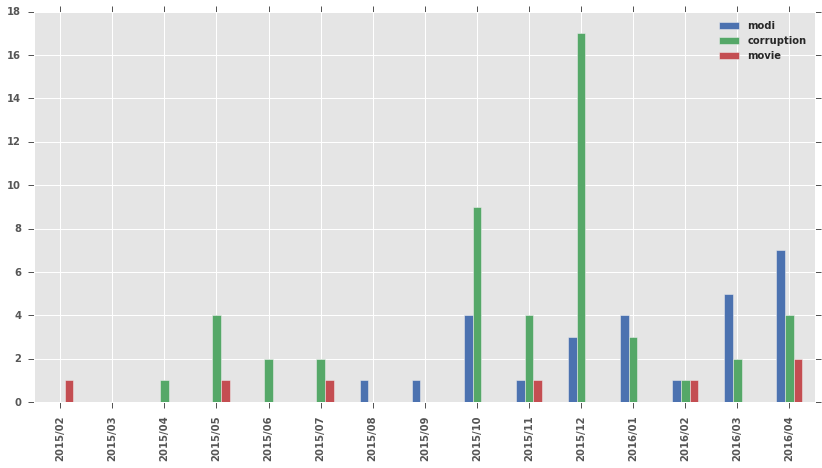

In [152]:
ak_new[['modi','corruption','movie']].plot(kind = 'bar')